In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [2]:
data=pd.read_csv('Bank_Customer.csv')


data=pd.read_csv('Bank_Customer.csv')
data = data.drop(labels=['customer_id'],axis=1) # 移除Id

label_map = {'Female': 0, 'Male': 1}
label_map1 = {'France': 3, 'Spain': 4,'Germany':5}

data['Class_gender'] = data['gender'].map(label_map)
data['Class_country'] = data['country'].map(label_map1)

data = data.drop(labels=['gender'],axis=1)
data = data.drop(labels=['country'],axis=1)



In [3]:
data

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Class_gender,Class_country
0,619,42,2,0.00,1,1,1,101348.88,1,0,3
1,608,41,1,83807.86,1,0,1,112542.58,0,0,4
2,502,42,8,159660.80,3,1,0,113931.57,1,0,3
3,699,39,1,0.00,2,0,0,93826.63,0,0,3
4,850,43,2,125510.82,1,1,1,79084.10,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,3
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,3
9997,709,36,7,0.00,1,0,1,42085.58,1,0,3
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,5


In [4]:
X=data.values
y=data['churn'].values

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=42)
print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (7000, 11)
Testing data shape: (3000, 11)


In [5]:
#由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大
#載入標準化比例尺(StandardScaler)套件
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data = pd.DataFrame(scaled_features,columns=data.columns[:11])
data

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Class_gender,Class_country
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165,-1.095988,-0.902587
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775,-1.095988,0.301665
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165,-1.095988,-0.902587
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775,-1.095988,-0.902587
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775,-1.095988,0.301665
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775,0.912419,-0.902587
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775,0.912419,-0.902587
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165,-1.095988,-0.902587
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165,0.912419,1.505917


In [6]:
#p1曼哈頓距離p2歐基里德p3明輝
knn = KNeighborsClassifier(n_neighbors=10,p=1,weights='distance',algorithm='auto')
knn.fit(X_train,y_train.astype('int'))
pred = knn.predict(X_test)

In [7]:
knn.predict(X_train)

array([1, 0, 0, ..., 1, 1, 0])

In [8]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2416
           1       0.25      0.07      0.10       584

    accuracy                           0.78      3000
   macro avg       0.53      0.51      0.49      3000
weighted avg       0.70      0.78      0.72      3000



In [9]:
knn.score(X_test,y_test.astype('int'))

0.7783333333333333

In [10]:
#評估模型的準確程度。
knn.score(X_train,y_train)

1.0

In [11]:
len(X_train)


7000

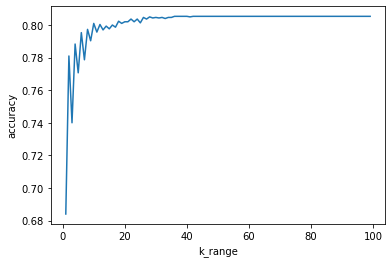

In [12]:
accuracy = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)                 
    y_pred = knn.predict(X_test)              
    accuracy.append(metrics.accuracy_score(y_test, y_pred)) 

k_range = range(1,100)
plt.xlabel('k_range')
plt.ylabel('accuracy')
plt.plot(k_range, accuracy)
plt.show()
